#  <font size="20"><font color="red"></b>Trending YouTube Video Statistics<b></font>

YouTube is a popular website for videos that everyone can upload.

The dataset is a daily record of the top trending YouTube videos.

This dataset composed of table for each big country: USA, Great Britain, Germany, Canada, and France, Russia, Mexico, South Korea, Japan and India. 

In each table you see description of the videos that post in the specific country.

You can see these factors including measuring user's interactions (number of views, comments and likes).

### Import external moudles

In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import matplotlib as mpl
from datetime import datetime, date
import json
from nltk.corpus import stopwords
import collections
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\talto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\talto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Read and clean the data
For start, lets explore what intresting features we have:

We chose to start with the dataset of USA.

In [2]:
df = pd.read_csv("./USvideos.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


The dataset has 40949 videos and 16 features. 

Execept the description feature, all the other are full of values.

Becuase it is only one feature with Null values - we chose to ignore him for our reshearch.

In [3]:
df = df.drop('description', axis=1)
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False


Some of the featuren are numeric and part of them are categorial (for example - category_id).

The category feature is in number which we don't know his meaning.

After read the description in Kaggle website - where we found the dataset: The names of the categories is in the suit Json file for each csv.

So we need to transform the <b>category_id</b> to <b>category_name</b>:

In [4]:
# We will read the Json file and save the appropriate list in the same order as in the csv file
with open("./US_category_id.json") as category_json:
    categories = json.load(category_json)["items"]
category_index_to_name = {}
for catgory in categories:
    category_index_to_name[int(catgory["id"])] = catgory["snippet"]["title"]
df['category_name'] = df['category_id'].map(category_index_to_name)
df = df.drop('category_id', axis=1)

In [5]:
df.head(5)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Entertainment


In [6]:
df.category_name.unique()

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

Now the categories are easy to understand.

Also we will want to reshearch the time for publish a video, so we want to saperate the feature <b>publish_time</b> for: publish_date and publish_hour:

In [7]:
# Get the publish month for each video
df['publish_date'] = df['publish_time'].map(lambda date: datetime.strftime(datetime.strptime(date, '%Y-%m-%dT%H:%M:%S.000Z'), '%d-%m-%Y'))
df['publish_hour'] = df['publish_time'].map(lambda date: datetime.strftime(datetime.strptime(date, '%Y-%m-%dT%H:%M:%S.000Z'), '%H:%M:%S'))
df = df.drop('publish_time', axis=1)
df.head(5)

,video_id,trending_date,title,channel_title,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,category_name,publish_date,publish_hour
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,People & Blogs,13-11-2017,17:13:01
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,Entertainment,13-11-2017,07:30:00
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Comedy,12-11-2017,19:05:24
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Entertainment,13-11-2017,11:00:04
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Entertainment,12-11-2017,18:01:41


In [8]:
#We transform the feature trending_date to the Day-Month-Year frame
df['trending_date'] = df['trending_date'].map(lambda date: datetime.strftime(datetime.strptime(date, '%y.%d.%m'), '%d-%m-%Y'))
df.head(5)

,video_id,trending_date,title,channel_title,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,category_name,publish_date,publish_hour
0,2kyS6SvSYSE,14-11-2017,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,People & Blogs,13-11-2017,17:13:01
1,1ZAPwfrtAFY,14-11-2017,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,Entertainment,13-11-2017,07:30:00
2,5qpjK5DgCt4,14-11-2017,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Comedy,12-11-2017,19:05:24
3,puqaWrEC7tY,14-11-2017,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Entertainment,13-11-2017,11:00:04
4,d380meD0W0M,14-11-2017,I Dare You: GOING BALD!?,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Entertainment,12-11-2017,18:01:41


## The number of videos follow the years - Usage of YouTube

We want to learn if the number of trending videos is from uniform distribution or is there a peroid where more videos publish then?

We chose to show it with histogram becuase it is the simple way to show the distribution over a lot of months.

Text(0.5, 1.0, 'Count of videos across time')

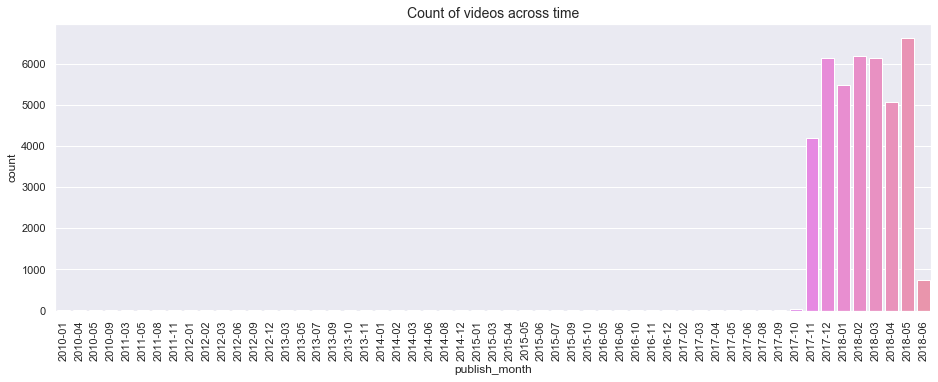

In [9]:
df['publish_month'] = df['publish_date'].map(lambda date: datetime.strftime(datetime.strptime(date, '%d-%m-%Y'), '%Y-%m'))
count_per_day = df.loc[df['publish_month'] >= '2010-01'].groupby(['publish_month']).size().reset_index(name='count')
# Plot graph
sns.set(rc={'figure.figsize':(15.7,5.27)})
sns.barplot(x='publish_month', y='count', data=count_per_day)
t = plt.xticks(rotation=90)
plt.title('Count of videos across time', size=14)

We can see the increase of records in the dataset is between 11-2017 till 05-2018.

Between those months there is no dramatic increase or decrease we can learn from it.

So we will cut all the videos who aren't publish till the January 2017.

We define that - all our assumptions and conclusions are for those 2 years.

Now the dataset has 40707 videos.
That means we remove 242 videos.


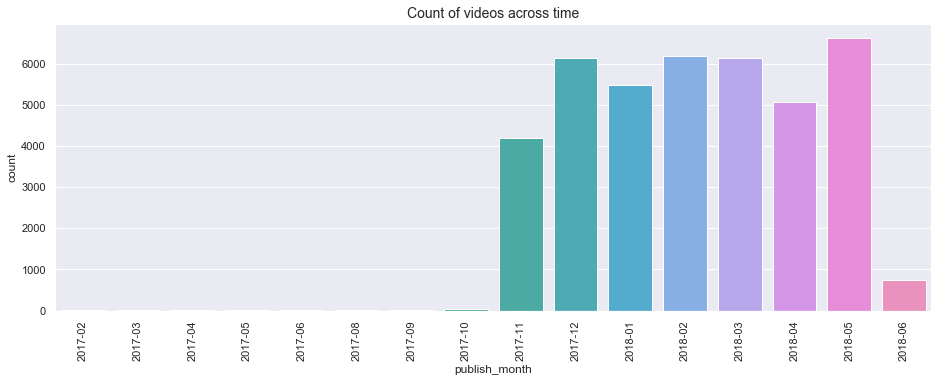

In [10]:
df = df[df['publish_month']>='2017-01']
count_per_day = df.loc[df['publish_month'] >= '2010-01'].groupby(['publish_month']).size().reset_index(name='count')
# Plot graph
print('Now the dataset has '+str(df.shape[0])+' videos.')
print('That means we remove '+str(40949-df.shape[0])+' videos.')
sns.set(rc={'figure.figsize':(15.7,5.27)})
sns.barplot(x='publish_month', y='count', data=count_per_day)
t = plt.xticks(rotation=90)
plt.title('Count of videos across time', size=14)
# remove the tmp columns:
df = df.drop('publish_month',axis=1)

# Part 1 - Exploratory Data Analysis
<br>
<font size="6"><font color="red"><b>Can we define video as successful and test it on our data?</b></font></font>

In our project suggestion we want to explore how we can define video's success?

For start, we find features do define this success:

## Number of views - 

In the suggestion for the project we want to explore the popolarity of the trending videos in YouTube.

Good way to ammount it is with number of views.

One aim for publisher is to show your product to as many potential customers. In YouTube case, for advirsment publishers or bloggers, they want their videos to be seen with maximal number of views.

That's why for start we reshearch this feature.

We start for histogram for show the distribution of this feature:

Text(0.5, 1.0, 'The distribution of views')

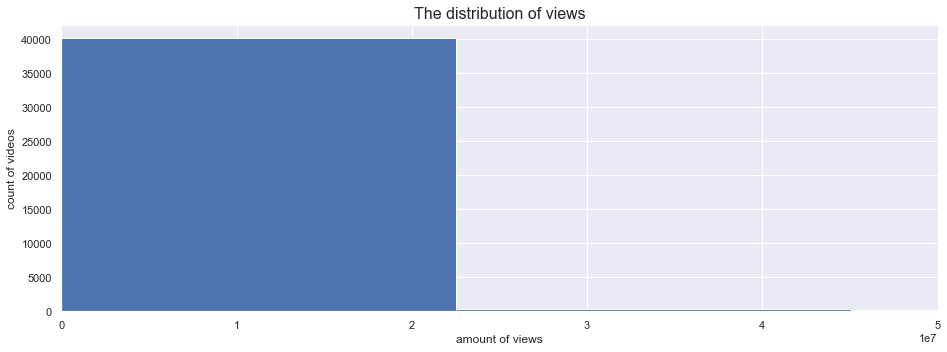

In [11]:
df.hist(column='views')
plt.xlim([0,50000000])
plt.xlabel('amount of views')
plt.ylabel('count of videos')
plt.title('The distribution of views', size=16)

From this histogram we can't learn a lot - most of the videos are in the same bar. 

This happened becuase the big units of the x-axis, Becuase we talk about trending videos, they usually have a lot of views.

Let's search for stastics:

How much we have in the range above 20,000,000?

In [12]:
precenage= (df[df['views']> 20000000]['video_id'].count()/df.shape[0])*100
print(str(round(precenage, 2))+'%')

1.71%


We can learn as it seen from the graph that the most of the videos are in range (0, 20000000).
Let's see the histogram for only this range:

Text(0.5, 1.0, 'The distribution of views')

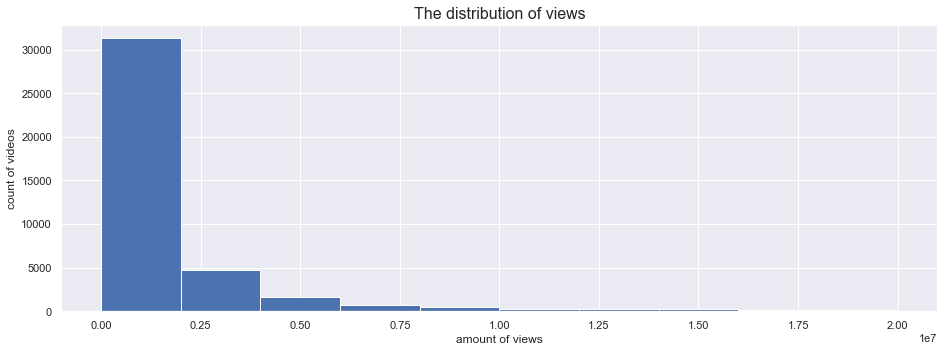

In [13]:
df_partial = df[df['views']<=20000000]
df_partial.hist(column='views')
plt.xlabel('amount of views')
plt.ylabel('count of videos')
plt.title('The distribution of views', size=16)

Now still a lot of the videos are in one bar.

Let's see how much from the videos are in range (0, 2,500,000)?

In [14]:
precenage= (df[df['views']<= 2500000]['video_id'].count()/df.shape[0])*100
print(str(round(precenage, 2))+'%')

81.08%


We see that 80% precants of the videos are in this range.

This saperation don't help us unforently.

We want to check some statistics of feature views:

In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['views'].describe()

count       40707.00
mean      2374506.08
std       7413909.61
min           549.00
25%        247648.50
50%        689313.00
75%       1835248.00
max     225211923.00
Name: views, dtype: float64

We can see that the std of the feature is huge. Also the diffrance between the 25% to 75% is about 1,500,000.

That's why we need a diffrent scale to this feature.

So we will look for transform the feature to another scale- so we will see the diffrance despite the high values and more important- keep the monotonous.

For example, we choose the log function:

Text(0.5, 1.0, 'The distribution for log views')

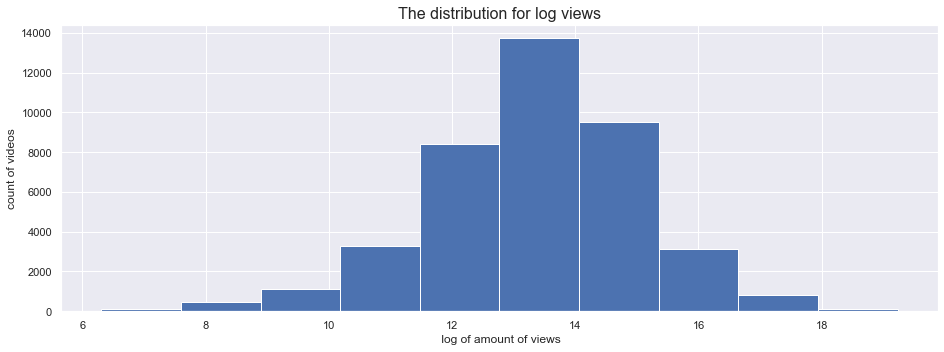

In [16]:
df['log_views'] = np.log(df['views'])
df.hist(column='log_views')
plt.xlabel(' log of amount of views')
plt.ylabel('count of videos')
plt.title('The distribution for log views', size=16)

Here we see histogram that remind us the normal distribution.

But remember here it is the <b>views' log</b>.
    
For visualization we will use the log feature for easy visualization, and for calculations we use the original views.

Another possible feature is:

## Likes - 

For start let's see the histogam for this feature:

Text(0.5, 1.0, 'The distribution for likes')

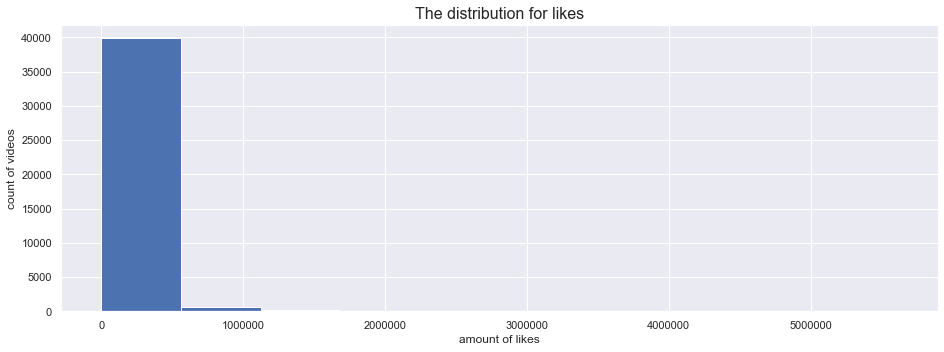

In [38]:
df.hist('likes')
plt.xlabel('amount of likes')
plt.ylabel('count of videos')
plt.title('The distribution for likes', size=16)

We see also here that there are lots of videos in the same bar.
Lets check the statistics for this feature:

In [34]:
df['likes'].describe()

count     40707.00
mean      74705.50
std      229493.70
min           0.00
25%        5575.00
50%       18336.00
75%       55825.00
max     5613827.00
Name: likes, dtype: float64

Also here we see a std big, means the range for this feature is long.

We can also here to transform it to a log-likes.

But after thoughts, a better solution to deal with it: We want to know the amount of people who watch and like the video - means the watchers take actually action to empasize they like what they see.

So instead to learn only the like and views separtly, we define new feature: <b>likes_views_prop</b>

this is the proporion of users who likes the video from the users who watch the video.

In this calculation we use the assumption that the views are saparate between the videos uniformally.

In this way, we get the 2 features both for examine the video success!

But before the calculation, we want to check first that there is a real connection between those 2 features:

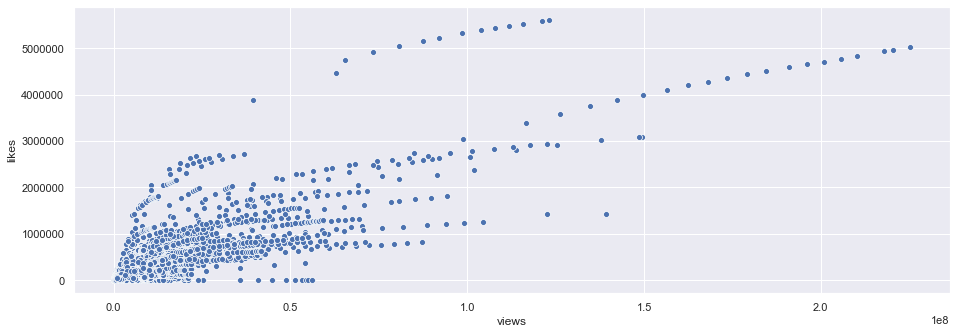

In [35]:
sns.scatterplot(x="views", y="likes", data=df)

We can see, as we except, there is a good relation between those features.

Where there is low views also low number of likes.

So we finally can calculate this new feature:

Text(0.5, 1.0, 'The distribution for likes_views_prop')

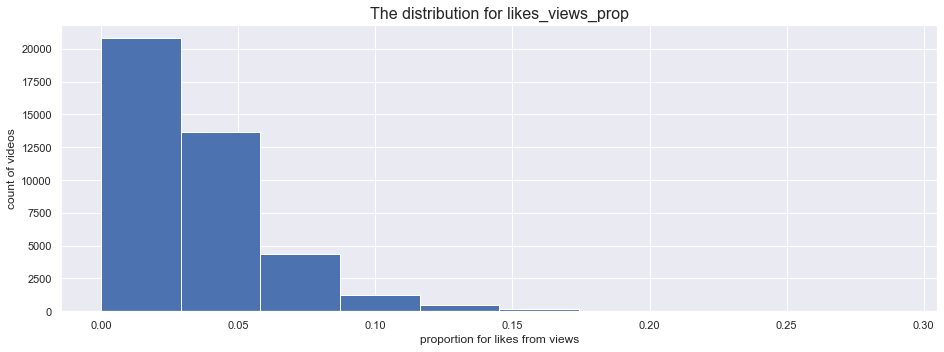

In [40]:
df['likes_views_prop'] = np.divide(df['likes'],df['views'])
df.hist('likes_views_prop')
plt.xlabel('proportion for likes from views')
plt.ylabel('count of videos')
plt.title('The distribution for likes_views_prop', size=16)

Another great possible feature is:

## Comment_count

For the same logic as likes, when user like a video he take an action and write a comment.

(The dataset doesn't give us the contents of those comments, so we assume all the comments are positive).

We want also here to calculate the comment_views_prop (in the same way as likes).

In this calculation we use the assumption that the comments are saparate between the videos uniformally.

We need first to check if there is a relation between those 2 features:

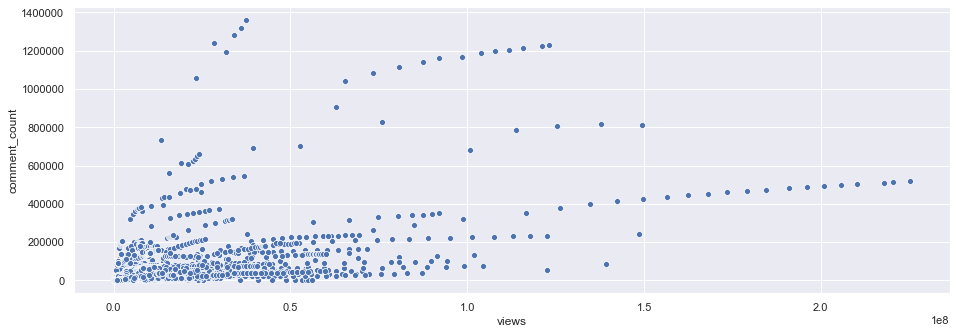

In [43]:
sns.scatterplot(x="views", y="comment_count", data=df)

We can see, as we except, there is a good relation between those features.

Where there is low views also low number of comments and also the opposite.

So we finally can calculate this new feature:

Text(0.5, 1.0, 'The distribution for comment_views_prop')

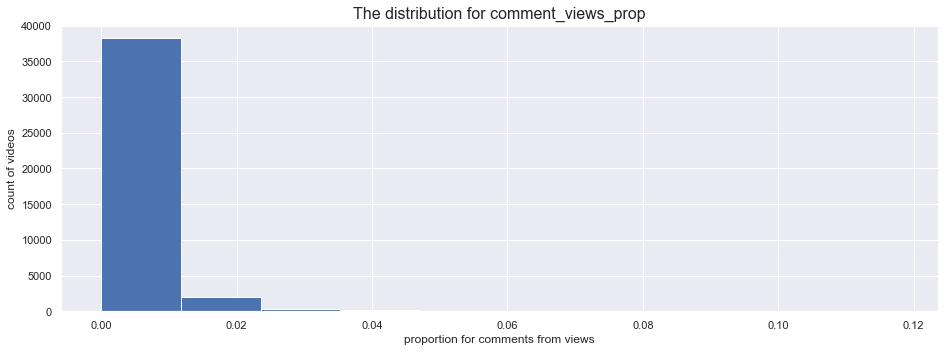

In [44]:
df['comment_views_prop'] = np.divide(df['comment_count'],df['views'])
df.hist('comment_views_prop')
plt.xlabel('proportion for comments from views')
plt.ylabel('count of videos')
plt.title('The distribution for comment_views_prop', size=16)

### Conclusion: in our project we decide to define video as successful if it has high value of:
* views
* likes_views_prop
* comment_views_prop

Now we want to check if other not intuitive feature has connection with our previous features that we chose to use them as definition to success.

## Title

As preview or abstract to the video, this feature can present the most frequent issues or terms in years 2017-8.

For start we show the most 20 frequent words in the titles:

Text(0.5, 1.0, '20 top frequent words in the videos title')

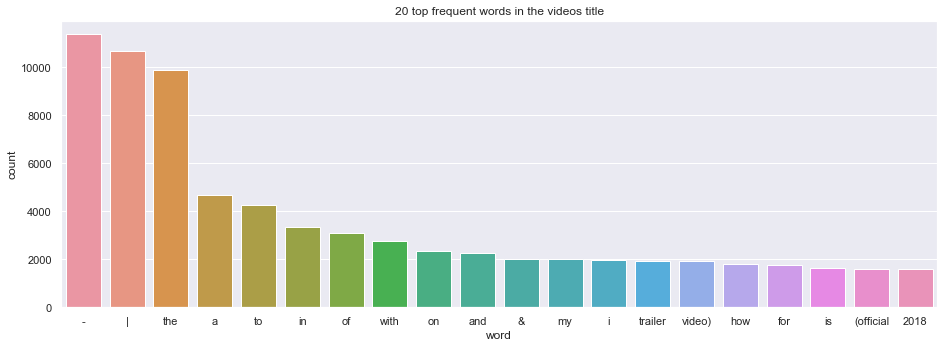

In [20]:
df['title']= [title.lower() for title in df['title']]
df['title_words']= df['title'].str.split(' ')
b=df['title_words'].sum()
word_counter=collections.Counter(b)
word_counter_df = pd.DataFrame.from_dict(word_counter, orient='index').reset_index().rename(columns={'index':'word', 0:'count'}).sort_values(by=['count'], ascending=False).head(20)
sns.barplot(x='word', y='count', data=word_counter_df).set_title('20 top frequent words in the videos title')

Most of the words we get are stopwords, We can't learn a lot from it.

So we will cut those stopwords for a better learn.

Text(0.5, 1.0, '20 top frequent words in the videos title')

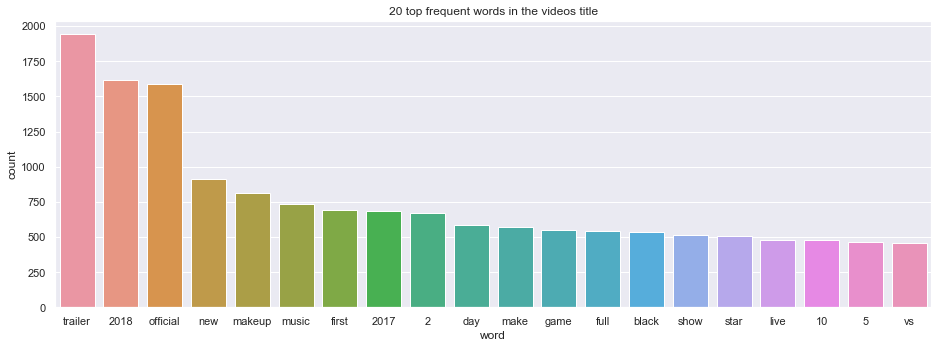

In [23]:
stop_words = stopwords.words('english')
clean_b = b.copy() # create a new list of tokens
for word in b:
    if word in stop_words:
        clean_b.remove(word)

#remove the signs & # and etc
clean_b = [word for word in clean_b if word.isalnum()]
word_counter=collections.Counter(clean_b)
word_counter_df = pd.DataFrame.from_dict(word_counter, orient='index').reset_index().rename(columns={'index':'word', 0:'count'}).sort_values(by=['count'], ascending=False).head(20)
sns.barplot(x='word', y='count', data=word_counter_df).set_title('20 top frequent words in the videos title')

we choose to see which topics are most comoon in youtube and not only what its category it falls into so we choose to seek the topics from the titles of the videos and sees which words are most commonly used.<br>
<br>
we can se that the 20 most common words are: <br>
1. <b>trailers</b>- meaning that in those years we can see that many movies and tv shows realsed there trailers in youtube.<br>
2. <b>years 2018 and 2017</b>- those are the years this data is concerns with. we can see that the year 2018 is mentioned more in the titles that 2017,so we can  suggest that there were more topics related to the year 2018 or more videos published in our data from the year 2018.
3. <b>makeup</b>- we can see that are many makeup related videos in this data.<br>
4. <b>offical</b>- we can infer that there are many covers to the videos that are trending and they are trending as well because you wouldnt write its the oficial video if its the only one out there or its the first one that pops in search.<br>
5. <b>music</b>- there are less music related videos than subject related videos eventhogh pepole are used to the idea that youtube is a music website. <br>
6. <b>new</b>- means that are new videos of the same topic. meaning there are many fllow up videos. <br>
7. <b>make</b>- there are many topics on youtube on how to make something by yourself.<br>
8. <b>game</b>- there many videos of gamers on the game they are playing.<br>
9. <b>star/show/live</b>- celebrity and news related topics.<br>
and more..<br>
<br>
from those topics we can suggest to companies how to advertise themselves: <br>
* in which category of videos to publish<br>
* if there are many follow up videos so they can consistently advertise there product <br>
* if there could be a simillar videos to this specific video. <br>
and more...

Let's see the frequent words in special way - Word Cloud:

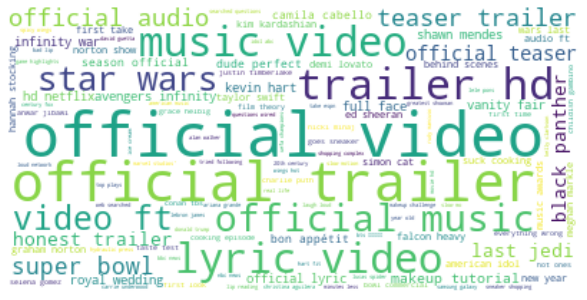

In [26]:
text = " ".join(title for title in df.title)
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see also here the same words like in the graph, but in more unique way.

We want to learn:
### if there is a connection between the length of a title to the video success?

For start we see the relation between the number of views to the length of title:

The title as the abstract of a video should be specific and also inviting to people - so it can't be too long. This tradeoff can be intresting if we can see it in the graph.

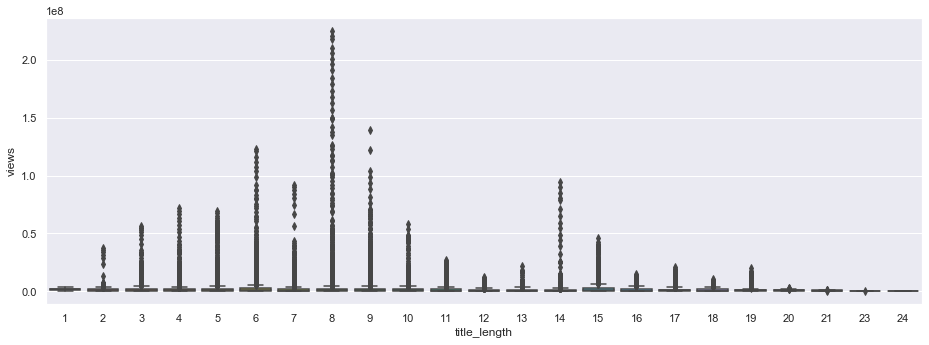

In [32]:
df['title_length'] = df['title_words'].map(lambda title: len(title))
sns.boxplot(x="title_length", y="views", data=df)

We can see that when the title is build from 6-9 words in it, the video probably has more views.

We can learn here the tradeoff: When the title is long there is not a lot of views - maybe the topic is too specific so not a lot of people interested in it.

When the video's title gets shorter soo the amount of views increasing.

But where the title is too shorter also there are not a lot of views - maybe there is not information in the title so the search engine doesn't success to bring it up, and that's why the video doesn't get recognization.

What about the relation between title length to likes_views_prop or comment_views_prop?

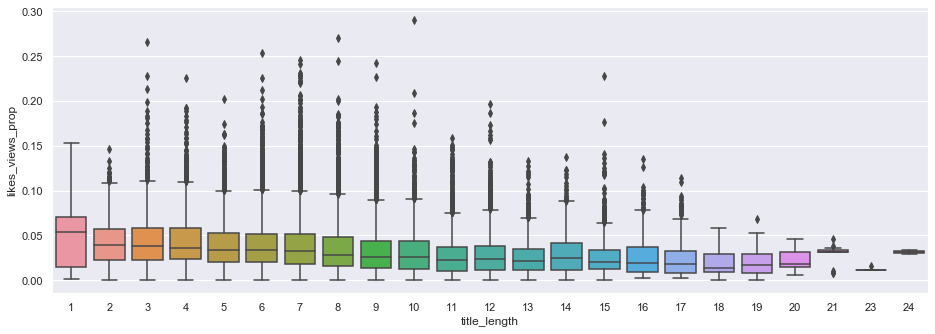

In [45]:
sns.boxplot(x="title_length", y="likes_views_prop", data=df)

We can see here a connection between those 2 features.

Also here we get the same conclusion as the previos tradeoff: When the title is long there is not a lot of views and likes, but when the title of video is too short there are also not a lot of likes and views. 

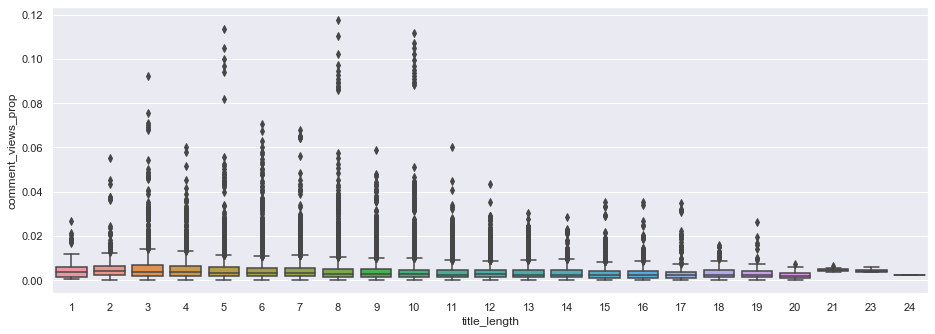

In [52]:
sns.boxplot(x="title_length", y="comment_views_prop", data=df)

Also here the tradeoff even stronger! 

So according the all tests, there is a relation between video's popularity to his title's length -  if the title length is between 3 to 8 probably the video will be more popular.

## Category_name

The dataset is saparated according the video's category.

Maybe there is a category that it is the most successful category in YouTube?

Let check the histogram for this feature:

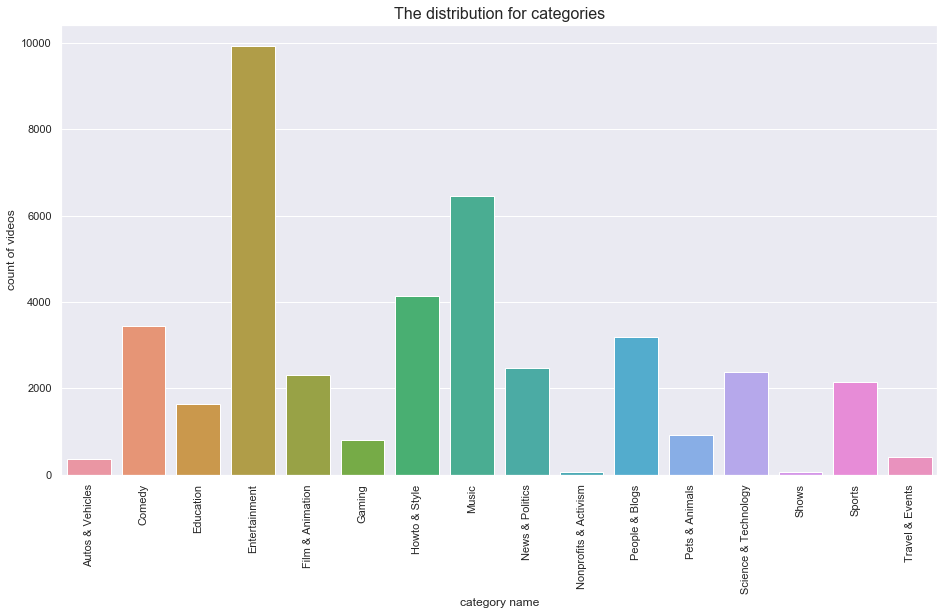

In [93]:
categories_df = df.groupby('category_name').agg({'video_id':'count', 'views': 'sum'}).reset_index().rename(columns={'video_id':'video_count', 'views': 'total_views'})
sns.barplot(x="category_name", y="video_count", data=categories_df)
plt.xlabel('category name')
plt.ylabel('count of videos')
plt.xticks(rotation=90)
plt.title('The distribution for categories', size=16)
plt.show()

Here we see that most of the videos are from Entertainment and Music categories.

Now we wnaat to check if the amount of the all videos is also in the views feature - the distribution for proportion for views from all category's videos:

In [94]:
categories_df

,category_name,video_count,total_views
0,Autos & Vehicles,371,520615085
1,Comedy,3449,5116652354
2,Education,1631,1180105300
3,Entertainment,9914,20601451231
4,Film & Animation,2297,7279781105
5,Gaming,811,2140947806
6,Howto & Style,4142,4078528831
7,Music,6454,40131569874
8,News & Politics,2472,1473322812
9,Nonprofits & Activism,57,168941392


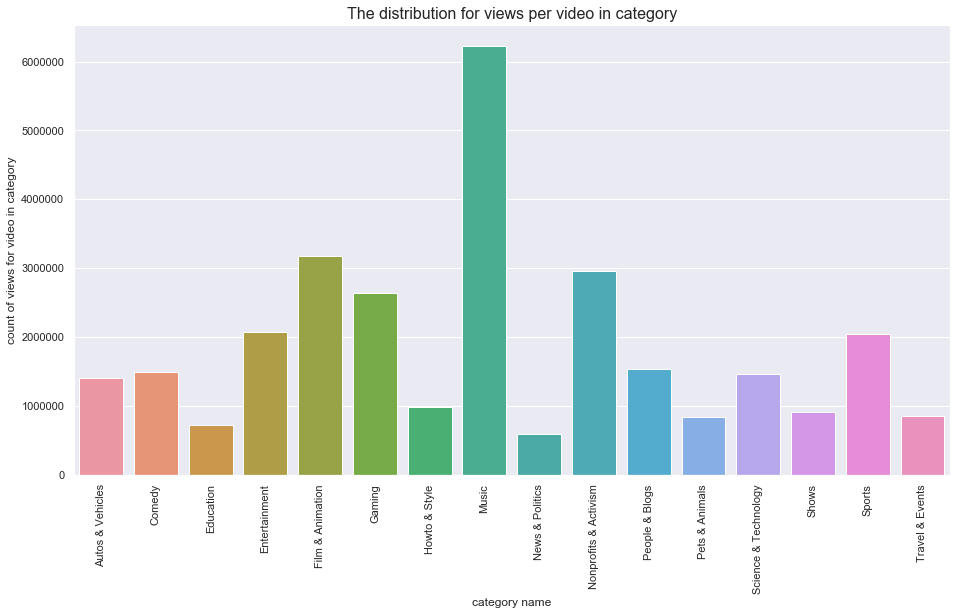

,category_name,prop_views
0,Music,6218092.64
1,Film & Animation,3169256.03
2,Nonprofits & Activism,2963884.07
3,Gaming,2639886.32
4,Entertainment,2078016.06
5,Sports,2043672.83
6,People & Blogs,1541037.59
7,Comedy,1483517.64
8,Science & Technology,1460988.11
9,Autos & Vehicles,1403275.16


In [99]:
categories_df['prop_views'] = np.divide(categories_df['total_views'], categories_df['video_count'])
sns.barplot(x="category_name", y="prop_views", data=categories_df)
plt.xlabel('category name')
plt.ylabel('count of views for video in category')
plt.xticks(rotation=90)
plt.title('The distribution for views per video in category', size=16)
plt.show()
categories_df_tmp = categories_df.sort_values(by=['prop_views'], ascending=False).reset_index()
categories_df_tmp[['category_name', 'prop_views']]

Here we see actually that most of views per video are going most of it to the Music not Entertainment as we thought.

We can conclude that the most popular category is Music and after it is the Film & Animation.

After this surprise, we want to check the features likes_views_prop and comment_views_prop: we want to learn if also there we can conclude the same ranking categories.

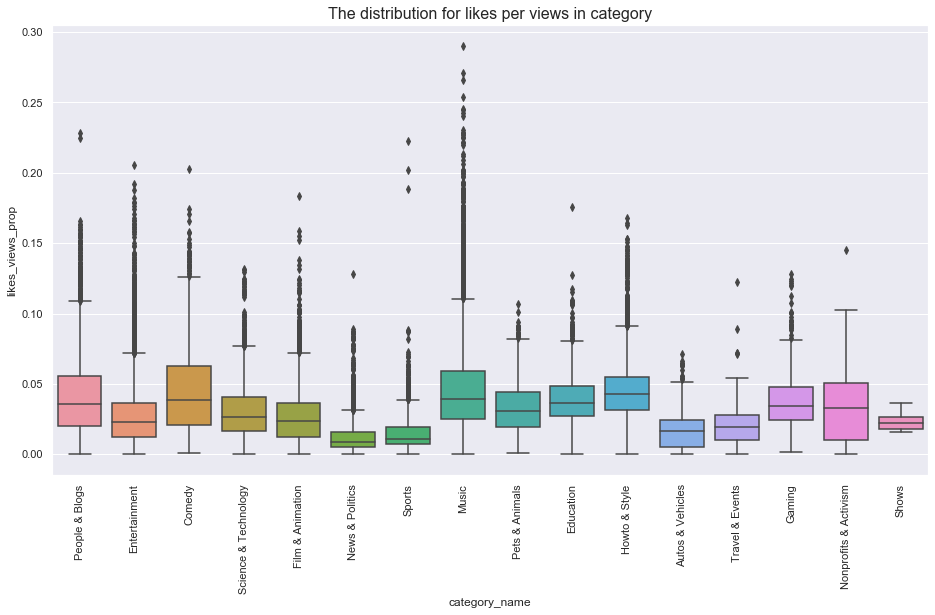

In [98]:
sns.boxplot(x="category_name", y="likes_views_prop", data=df)
plt.xticks(rotation=90)
plt.title('The distribution for likes per views in category', size=16)
plt.show()

Also here we see that a lot of people are like and watch the Music category.

But surprisingly, also the Comedy and Howto & Style getting a lot of likes and views -  this is surprise becuase Comedy got in the 8 place for the views per video - means this category get a lot of likes, and Howto & Style got in the 11 place.

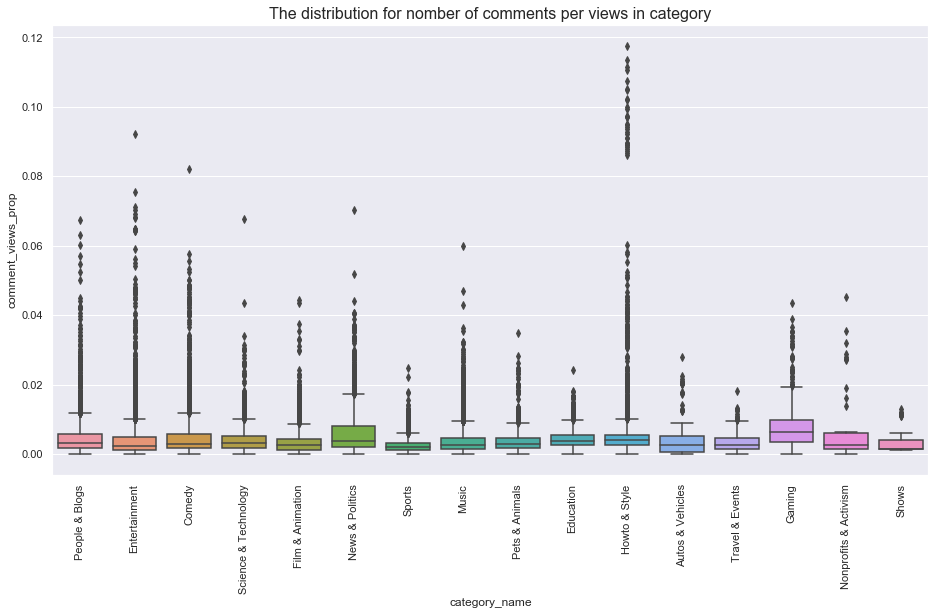

In [100]:
sns.boxplot(x="category_name", y="comment_views_prop", data=df)
plt.xticks(rotation=90)
plt.title('The distribution for nomber of comments per views in category', size=16)
plt.show()

Also here we get surprises! 
The News & Politics and Gaming categories get the highest median of this proportion, if we add it to the fact that Politics was in the last place in the comparing number of views per videos in category - means that this category gets a lot of commands!
This makes sense with probably the multi opinions in this topic.

Also the low rank of Music category is not surprise becuase, a music video doesn't follow usually lot of disscussions as politics.

### Conclusions:
* Music is the mst watched category in Youtube.
* Comedy and People & BLogs and Music are the most liked categories.
* Gaming & Politics are most commented categories.
* Each feature of success we chose - define diffrent category as the most successful, so for publisher we recommand to think what is aim for the video publish? according to this, he can check if the video success or not.

## Publish_time

For each video we have his publish date. We think maybe if video publish in weekend or workday it has an affect to his success?

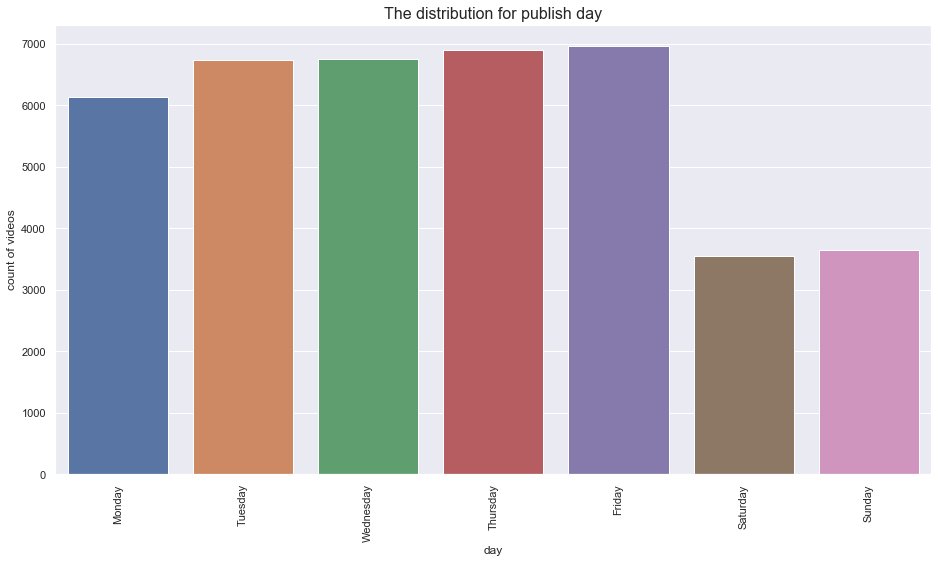

In [116]:
days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

def calculate_day(input_date):
    day, month, year = (int(x) for x in input_date.split('-'))    
    input_data = date(year, month, day)
    dayNumber=input_data.weekday()
    return days[dayNumber]

df['day'] = [calculate_day(date) for date in df['publish_date']]
days_df = df.groupby('day').agg({'video_id':'count', 'views': 'sum'}).reset_index().rename(columns={'video_id':'video_count', 'views': 'total_views'})
sns.barplot(x="day", y="video_count", data=days_df, order=days)
plt.xlabel('day')
plt.ylabel('count of videos')
plt.xticks(rotation=90)
plt.title('The distribution for publish day', size=16)
plt.show()

We can see the saparate between the workday to weekend. In each sub-group of days the count of videos is almost the same.

In the workday there is larges amount of videos that publish than in the weekend.

According to this result, it will make easy to see the relation between the ratio between views per video in day publish and proportion likes per views and comments per views:

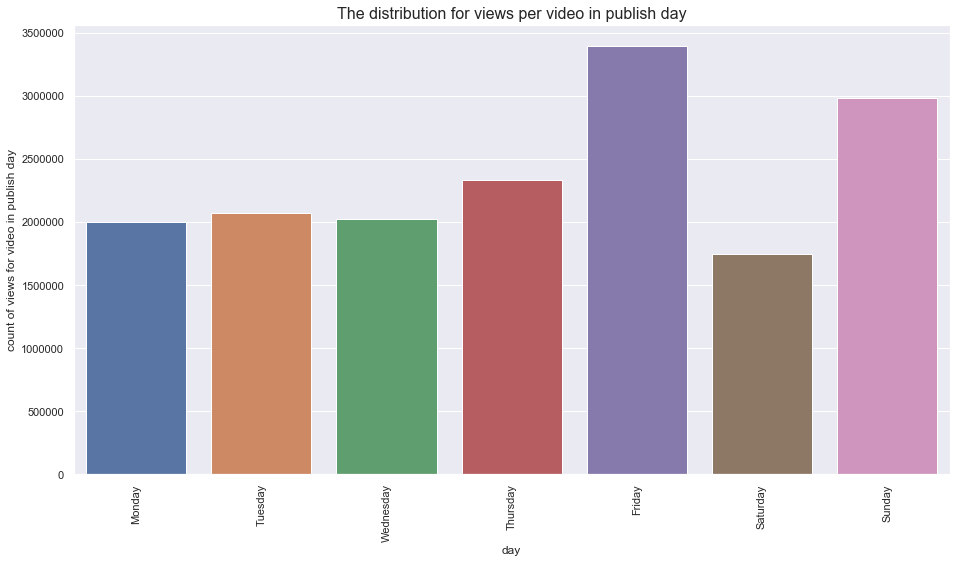

In [119]:
days_df['prop_views'] = np.divide(days_df['total_views'], days_df['video_count'])
sns.barplot(x="day", y="prop_views", data=days_df, order=days)
plt.xlabel('day')
plt.ylabel('count of views for video in publish day')
plt.xticks(rotation=90)
plt.title('The distribution for views per video in publish day', size=16)
plt.show()

Here we can see another point of view:
In the workday there isn't a big change in the views per video, but when it's get closer to weekend - there is an increase in the amount of views per video: specially in Friday- the start of the weekend.

We expect to see also here a uniformally saperation in the views in the weekend, but there is a big decrease in the amount of views in the videos which were publish in Saturday.

We can see that most popular videos are the ones which were publish in Friday and Sunday - the weekend.

Probably there is a connection to the weekend: it is hard to get specific conclusion about it becuase we don't have information about how really the views are saparated over time isn't publish to us, maybe the uniformally assumption isn't work here.

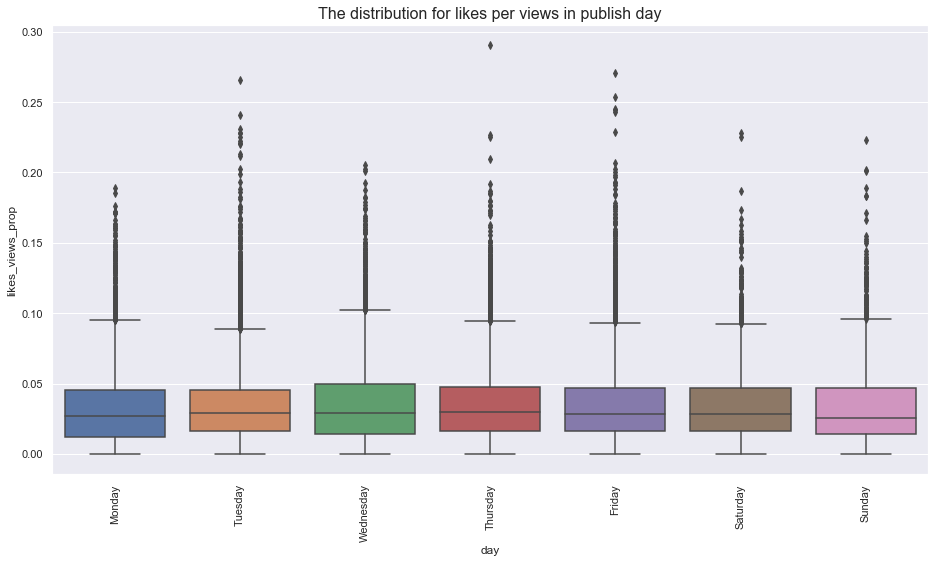

In [120]:
sns.boxplot(x="day", y="likes_views_prop", data=df, order=days)
plt.xticks(rotation=90)
plt.title('The distribution for likes per views in publish day', size=16)
plt.show()

Surprisingly we don't see a diffrance between the days in this feature.

But with the conclusions we get in the previos graphs we can say that becuase it is a proportion and we know that most of the videos are publish in the workday have less views - we can assume that they have also low amount of likes. The same conclusion also for Friday and Sunday - they both have a lot of views, so accordingly they have also high amount of likes.

We get extra prove for the correlation between the views and likes features we saw before.

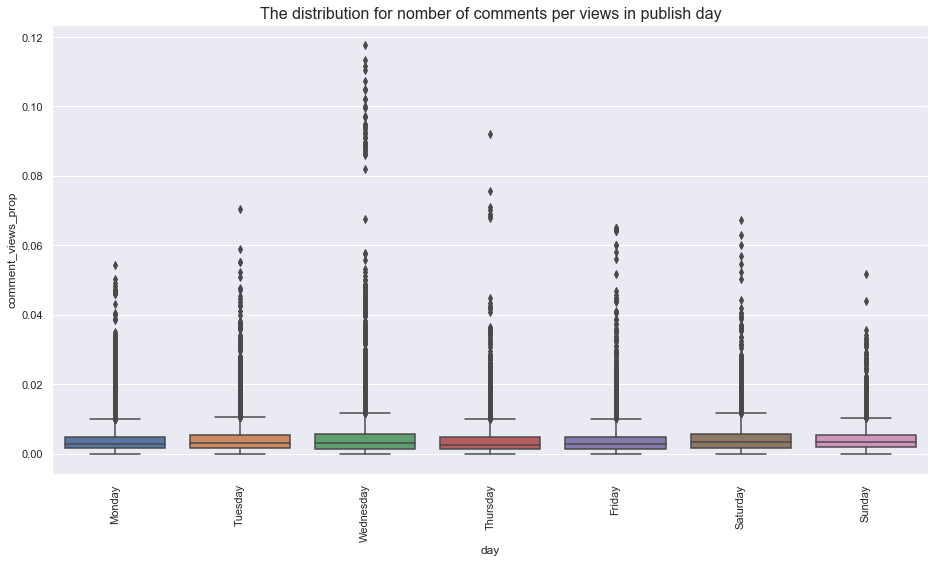

In [121]:
sns.boxplot(x="day", y="comment_views_prop", data=df, order=days)
plt.xticks(rotation=90)
plt.title('The distribution for nomber of comments per views in publish day', size=16)
plt.show()

Also here we get the same conclusions as in the likes_views_prop graph: becuase it is a proportion and we know that most of the videos are publish in the workday have less views - we can assume that they have also low amount of comments. The same conclusion also for Friday and Sunday - they both have a lot of views, so accordingly they have also high amount of comments.

We see here also extra prove for the correlation between the views to number of comments features we ssaw before.

### Conclusions: It is better to publish a video in Friday of Sunday.

## comments_disabled 

We want to check the distribution for this boolean feature:

becuase it is a boolean and only has 2 known values:True, False. 
This distribution is easy to be seen in a pie chart.

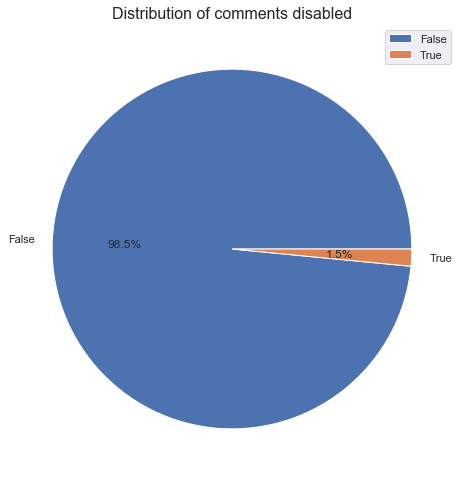

In [123]:
comments_disabled_count = df['comments_disabled'].value_counts()
plt.title('Distribution of comments disabled', fontsize=16)
plt.pie(comments_disabled_count.values, labels=comments_disabled_count.keys(), autopct='%1.1f%%',)
plt.legend(bbox_to_anchor=(1, 1))

We don't have a lot of videos which their comments are disable, so we can't conclude a lot about this feature.

But we can assume that becuase this dataset is all tranding videos: most of the successsful videos are possible to been comment, perhaps this freedom affect the success.

## 	ratings_disabled

We want to check the distribution for this boolean feature:

becuase it is a boolean and only has 2 known values:True, False. 
This distribution is easy to be seen in a pie chart.

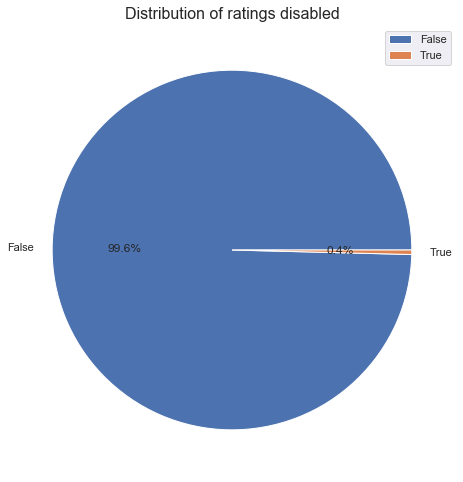

In [125]:
ratings_disabled_count = df['ratings_disabled'].value_counts()
plt.title('Distribution of ratings disabled', fontsize=16)
plt.pie(ratings_disabled_count.values, labels=ratings_disabled_count.keys(), autopct='%1.1f%%',)
plt.legend(bbox_to_anchor=(1, 1))

We don't have a lot of videos which their ratings are disable, so we can't conclude a lot about this feature.

But we can assume that becuase this dataset is all tranding videos: most of the successsful videos are possible to been ratings, perhaps this freedom affect the success.

## video_error_or_removed 

We want to check the distribution for this boolean feature:

becuase it is a boolean and only has 2 known values:True, False. 
This distribution is easy to be seen in a pie chart.

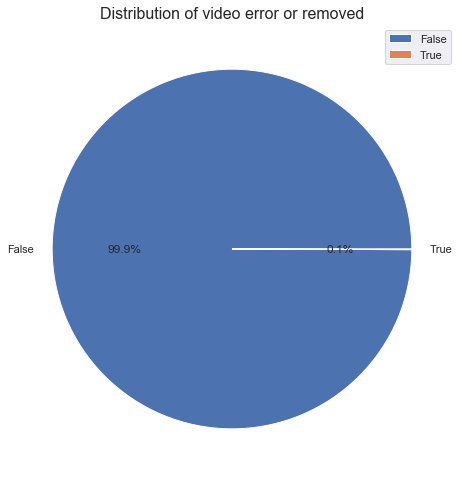

In [126]:
video_error_or_removed_count = df['video_error_or_removed'].value_counts()
plt.title('Distribution of video error or removed', fontsize=16)
plt.pie(video_error_or_removed_count.values, labels=video_error_or_removed_count.keys(), autopct='%1.1f%%',)
plt.legend(bbox_to_anchor=(1, 1))

Unforently, most of the videos in our dataset haven't error or removed.

So we can't learn or reshearch the reasons for removed videos.

<font size="6"><font color="red"><b>Can we explore state habits in the internet?</b></font></font>

Another question we ask in our project suggestion is to explore the countries habits in the web.

Can we learn diffrance or similarity between countries?

This dataset has csv file for each country sapartly.
For analysis we union them to one dataset and explore their intersts and habits.

In [140]:
country_list = ['CA', 'DE', 'FR', 'GB', 'US']
union_df = pd.DataFrame()
for country in country_list:
    # Retreive the category names and insert them to the dataframe
    print
    with open("./" + country + "_category_id.json") as category_json:
        categories = json.load(category_json)["items"]
    category_index_to_name = {}
    for catgory in categories:
        category_index_to_name[int(catgory["id"])] = catgory["snippet"]["title"]

    df_tmp = pd.read_csv("./" + country + "videos.csv")
    df_tmp['category_name'] = df_tmp['category_id'].map(category_index_to_name)
    df_tmp['country'] = [country for x in range(df_tmp.shape[0])]
    union_df = pd.concat([union_df,df_tmp])

union_df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,CA
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,News & Politics,CA
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...,Comedy,CA
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,CA
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...,Entertainment,CA
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...,People & Blogs,CA


### compare their intersts according categories distribution:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

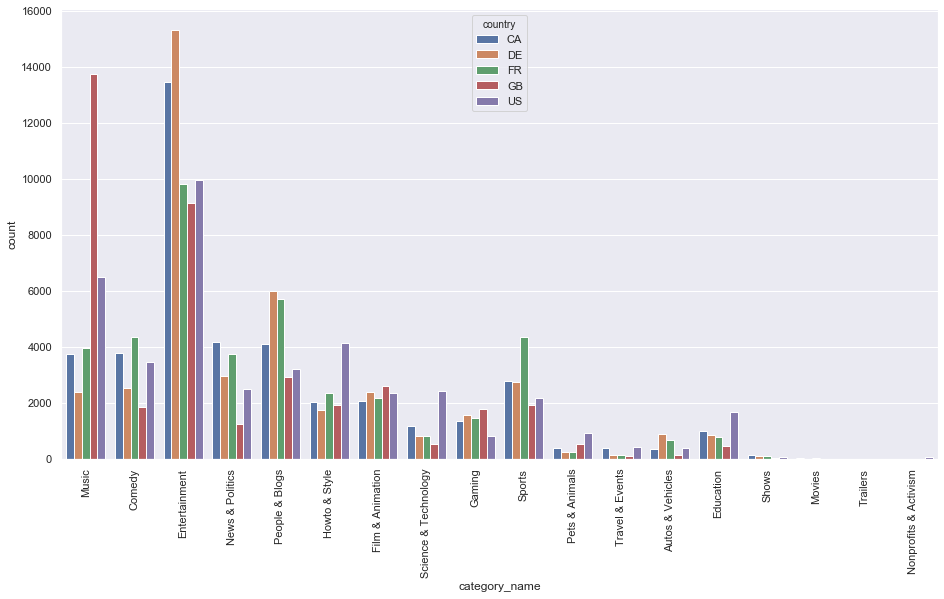

In [142]:
sns.countplot(x="category_name", hue="country", data=union_df)
plt.xticks(rotation=90)

It's appear that Canada and Germany are most interested in Entertainment videos, while Great Britian most interest Music.

USA is more separated between those 2 categories.

Also we can see that France is the country which most interested in Sport videos.

We can see in the category People & Blogs - France and Germany are the countries who are most interested in it.

### Now we calculate likes per views for each country:

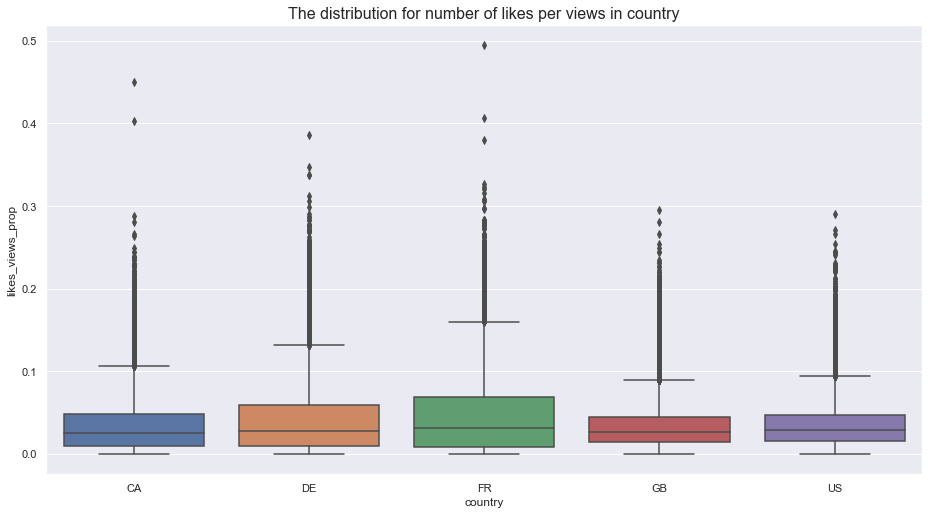

In [151]:
#union_df[''] = union_df.groupby('country').agg({'views': 'sum', 'likes': 'sum', 'comment_count': 'sum'}).reset_index().rename(columns={'views': 'total_views', 'likes': 'total_likes', 'comments': 'total_comments'})
union_df['likes_views_prop'] = np.divide(union_df['likes'], union_df['views'])
sns.boxplot(x="country", y="likes_views_prop", data=union_df)
plt.title('The distribution for number of likes per views in country', size=16)
plt.show()

We can see here that France is the country that brings the most likes. After her it is Germany and then Canada.

### Now we calculate the ratio between the comments per views for each country:

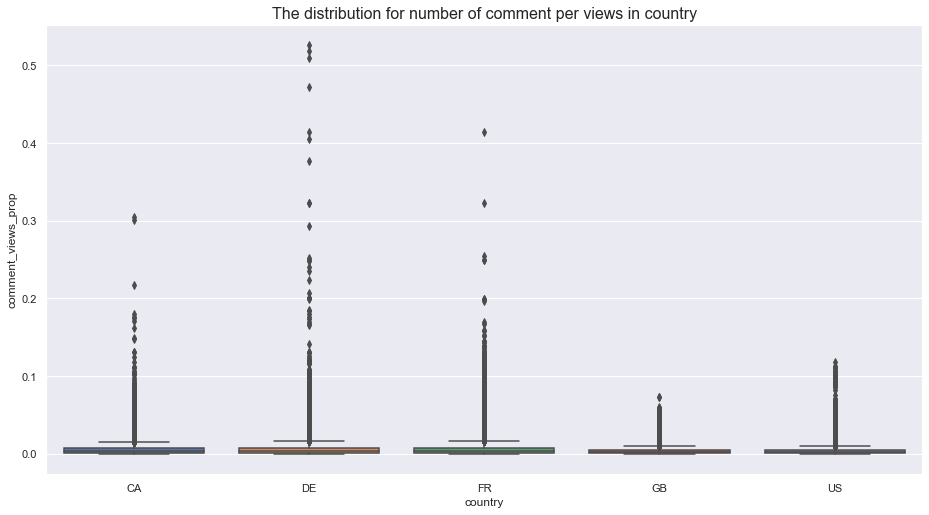

In [154]:
union_df['comment_views_prop'] = np.divide(union_df['comment_count'], union_df['views'])
sns.boxplot(x="country", y="comment_views_prop", data=union_df)
plt.title('The distribution for number of comment per views in country', size=16)
plt.show()

We cant see any diffrance in this graph. 

So we use -log function to keep the order but empasize the diffrance.

C:\Users\talto\Anaconda3\envs\py3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


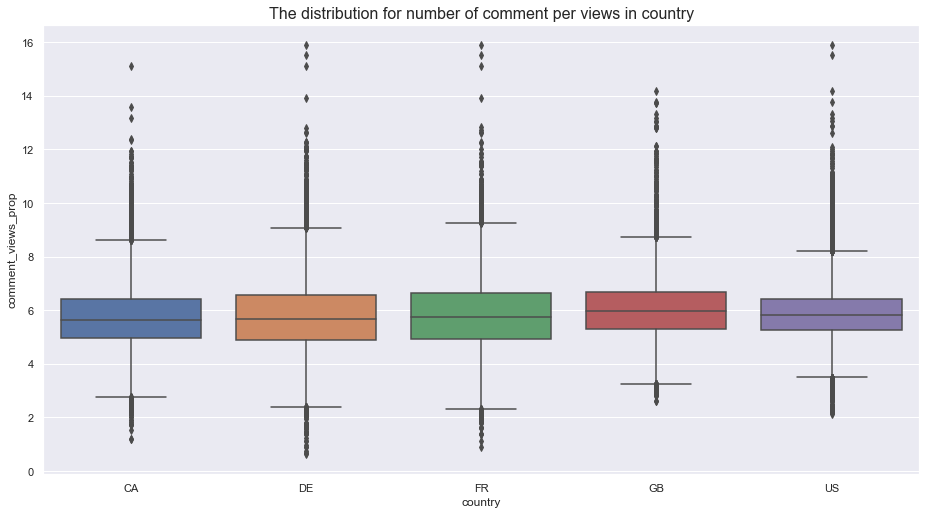

In [155]:
union_df['comment_views_prop'] = -1*np.log(np.divide(union_df['comment_count'], union_df['views']))
sns.boxplot(x="country", y="comment_views_prop", data=union_df)
plt.title('The distribution for number of comment per views in country', size=16)
plt.show()

There is no big diffrance between those distributions.

Also in this parameter France and Germany are leading but now with Great Britian - this country in the previous g

## Intresting channels

# Part 2 - Estimation and Hypothesis Testing

# Part 3 - Classification